## Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## load dataset

In [8]:
data = pd.read_csv('dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [9]:
print (data)

                                                   teks  label
0     [PROMO] Beli paket Flash mulai 1GB di MY TELKO...      2
1     2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...      2
2     2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...      2
3     2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...      2
4     4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...      2
...                                                 ...    ...
1138     Yooo sama2, oke nanti aku umumin di grup kelas      0
1139  😁 sebelumnya ga ad nulis kerudung. Kirain warn...      0
1140                               Mba mau kirim 300 ya      0
1141  nama1  beaok bwrangkat pagi...mau cas atay tra...      0
1142                         No bri atas nama kamu mana      0

[1143 rows x 2 columns]


## TEXT PREPROCESSING

## 1. Case Folding

In [10]:
import re

#MEMBUAT FUNGSI UNTUK CASE FOLDING
def casefolding(text):
    text = text.lower()                                 # merubah kalimat menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # menghapus url dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text)              # menghapus angka dari kalimat
    text = re.sub(r'[^\w\s]', '', text)                 # menghapus tanda baca / karakter
    text = text.strip()
    return text

In [11]:
## TOKENIZING

def tokenizing(text):
    tokens = text.split()
    return tokens

In [12]:
# membandingkan before dan after case folding
raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)

print('Raw data\t : ', raw_sample)
print('Case Folding\t : ', case_folding)

Raw data	 :  2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding	 :  plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub


## 2. Word Normalization

In [13]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
        if (key_norm['singkat'] == word).any()
        else word for word in text.split()               
    ])

    text = str.lower(text)
    return text

In [14]:
# membandingkan before dan after word normalization

raw_data = data['teks'].iloc[696]
word_normal = text_normalize(case_folding)

print('Raw Data\t : ', raw_data)
print('Word Normalize\t : ', word_normal)

Raw Data	 :  Btw magicomnya yg sedang Gais, gaada yg gede
Word Normalize	 :  pelanggan yang terhormat sisa kuota flash anda kb download mytelkomsel apps di untuk cek kuotabeli paket flash atau hub


## 3. Filtering (Stopword Removal)

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [16]:
len(stopwords_ind)

758

In [17]:
#MELIHAT DAFTAR STOPWORD DARI NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [18]:
# menambahkan kata dalam stopword
more_stopword = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

# membuat fungsi stopword removal
def remove_stop_word(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [19]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)

print('Raw Data \t\t : ', raw_data)
print('Case Folding \t\t : ', case_folding)
print('Stopword Removal \t : ', stopword_removal)

Raw Data 		 :  Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding 		 :  btw magicomnya yg sedang gais gaada yg gede
Stopword Removal 	 :  magicomnya yg gais gaada yg gede


## 4. Stemming

In [20]:
!pip -q install sastrawi

In [21]:
# merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [22]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t : ', raw_sample)
print('Case Folding \t\t : ', case_folding)
print('Stopword Removal \t : ', stopword_removal)
print('Stemming \t\t : ', text_stemming)

Raw Data 		 :  Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding 		 :  btw magicomnya yg sedang gais gaada yg gede
Stopword Removal 	 :  magicomnya yg gais gaada yg gede
Stemming 		 :  magicomnya yg gais gaada yg gede


## text preprocessing pipeline

In [23]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [24]:
%%time
data['clean_teks'] = data['teks'].apply(text_preprocessing_process)

CPU times: total: 3min 32s
Wall time: 3min 35s


In [25]:
data

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash my telkomsel app dpt ex...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,langgan hormat sisa kuota flash kb download my...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,langgan hormat sisa kuota flash kb download my...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,rupiah ribu spesial pilih aktif buru skb
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,ga nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


In [26]:
# simpan data yang sudah dipreprocessing ke dalam file csv
data.to_csv('clean_data.csv')

## FEATURE ENGINEERING

In [27]:
# pisahkan kolom feature dan target
x = data['clean_teks']
y = data['label']

In [28]:
x

0       promo beli paket flash my telkomsel app dpt ex...
1       rupiah ribu spesial pilih aktif promo sd novem...
2       langgan hormat sisa kuota flash kb download my...
3       langgan hormat sisa kuota flash kb download my...
4                rupiah ribu spesial pilih aktif buru skb
                              ...                        
1138                           yooo oke umumin grup kelas
1139                  ga nulis kerudung kirain warna jins
1140                                        mbak kirim ya
1141        nama beaok bwrangkat pagimau cas atay tranfer
1142                                       nomor bri nama
Name: clean_teks, Length: 1143, dtype: object

In [29]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

### TF-IDF dan N-Gram

In [30]:
# save model
import pickle

# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

# Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [31]:
# menampilkan vocabulary(kata-kata) dari tf-idf
vec_TF_IDF.vocabulary_

{'promo': 2441,
 'beli': 322,
 'paket': 2234,
 'flash': 915,
 'my': 2026,
 'telkomsel': 3020,
 'app': 161,
 'dpt': 787,
 'extra': 886,
 'kuota': 1676,
 'lte': 1792,
 'telpon': 3023,
 'mnthr': 1977,
 'buru': 479,
 'cek': 520,
 'tselmemytsel': 3156,
 'sk': 2837,
 'rupiah': 2649,
 'ribu': 2598,
 'spesial': 2896,
 'pilih': 2321,
 'aktif': 66,
 'sd': 2703,
 'november': 2135,
 'langgan': 1706,
 'hormat': 1191,
 'sisa': 2830,
 'kb': 1509,
 'download': 783,
 'mytelkomsel': 2028,
 'apps': 166,
 'kuotabeli': 1677,
 'hub': 1210,
 'skb': 2838,
 'ekstra': 845,
 'pulsa': 2478,
 'dg': 683,
 'internet': 1307,
 'bulan': 465,
 'sjk': 2836,
 'augsept': 216,
 'detail': 678,
 'iring': 1330,
 'dgn': 684,
 'tarif': 2987,
 'hr': 1200,
 'panjang': 2247,
 'hits': 1180,
 'armada': 179,
 'curi': 608,
 'hati': 1141,
 'tekan': 3014,
 'okcall': 2187,
 'info': 1270,
 'eks': 842,
 'loh': 1778,
 'internetan': 1308,
 'pakai': 2232,
 'volume': 3272,
 'ultima': 3209,
 'mbhr': 1884,
 'hrga': 1203,
 'tariflokasi': 2989,
 't

In [32]:
# melihat jumlah feature
print(len(vec_TF_IDF.get_feature_names_out()))

3396


In [33]:
# melihat fitur apa saja yg ada didalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [34]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_td_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_td_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data_tabular_td_idf.iloc[10:20,60:70]

,akang,akangteteh,akbar,akreditasi,akses,aksi,aktif,aktifasi,aktivasi,aktivitas
10,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.000000,0.0,0.144168,0.0,0.000000,0.0
12,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
13,0.0,0.0,0.0,0.0,0.261863,0.0,0.000000,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.000000,0.0,0.244053,0.0,0.382416,0.0
15,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
17,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
18,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
19,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


## FEATURE SELECTION

In [36]:
x_train = np.array(data_tabular_td_idf)
y_train = np.array(y)

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# untuk reduced feature
print('Original Feature Number', x_train.shape[1])
print('Reduced Feature Number', x_kbest_features.shape[1])

Original Feature Number 3396
Reduced Feature Number 3000


In [38]:
Data = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
Data

,Nilai
0,0.923549
1,0.360753
2,1.526771
3,0.716455
4,0.798891
...,...
3391,1.178092
3392,0.497881
3393,0.716455
3394,2.842117


In [39]:
# menampilkan data feature beserta nilainya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.923549,aa
1,0.360753,aamiiiin
2,1.526771,aamiin
3,0.716455,ab
4,0.798891,abadi
...,...,...
3391,1.178092,zalora
3392,0.497881,zarkasi
3393,0.716455,zjt
3394,2.842117,zona


In [40]:
# mengurutkan nilai feature terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2234,48.039735,paket
1101,45.342329,hadiah
1676,44.893649,kuota
2324,38.957938,pin
1591,33.864905,klik
...,...,...
1962,0.053418,minta
306,0.044229,bca
617,0.041680,daftar
1838,0.033171,maksimal


In [41]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [42]:
# menampilkan fitur-fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yang sudah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
    if bool : 
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acara',
 'acaratks',
 'account',
 'ada',
 'adapromo',
 'adi',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'ado',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aea',
 'aesthetic',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agam',
 'agen',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agus',
 'agust',
 'agustuskunjungi',
 'ahaha',
 'ahub',
 'aidzin',
 'aigoo',
 'air',
 'aja',
 'ajaa',
 'ajabri',
 'ajak',
 'ajeng',
 'akang',
 'akangteteh',
 'akbar',
 'akreditasi',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivitas',
 'akucintaislam',
 'akumulasi',
 'akun',
 'akurasi',
 'akurat',
 'alaikum',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamat',
 'alamsyah',
 'alat',
 'alesannya',
 'algoritma',
 'alhamdulillah',
 'alhuda',
 'ali',
 'aliando',
 'all',
 'allah',
 'allahaamiin',
 'alphard',
 'alquran',
 'alur',
 'aman',
 'amanda',
 'amin',
 

In [43]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k, v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v

new_selected_feature

{'promo': 2441,
 'beli': 322,
 'paket': 2234,
 'flash': 915,
 'my': 2026,
 'telkomsel': 3020,
 'app': 161,
 'dpt': 787,
 'extra': 886,
 'kuota': 1676,
 'lte': 1792,
 'telpon': 3023,
 'mnthr': 1977,
 'buru': 479,
 'cek': 520,
 'tselmemytsel': 3156,
 'sk': 2837,
 'rupiah': 2649,
 'ribu': 2598,
 'spesial': 2896,
 'pilih': 2321,
 'aktif': 66,
 'sd': 2703,
 'november': 2135,
 'langgan': 1706,
 'hormat': 1191,
 'sisa': 2830,
 'kb': 1509,
 'download': 783,
 'mytelkomsel': 2028,
 'apps': 166,
 'kuotabeli': 1677,
 'hub': 1210,
 'skb': 2838,
 'ekstra': 845,
 'pulsa': 2478,
 'dg': 683,
 'internet': 1307,
 'bulan': 465,
 'sjk': 2836,
 'augsept': 216,
 'detail': 678,
 'iring': 1330,
 'dgn': 684,
 'tarif': 2987,
 'hr': 1200,
 'panjang': 2247,
 'hits': 1180,
 'armada': 179,
 'curi': 608,
 'hati': 1141,
 'tekan': 3014,
 'okcall': 2187,
 'info': 1270,
 'eks': 842,
 'loh': 1778,
 'internetan': 1308,
 'pakai': 2232,
 'volume': 3272,
 'ultima': 3209,
 'mbhr': 1884,
 'hrga': 1203,
 'tariflokasi': 2989,
 't

In [44]:
len(new_selected_feature)

3000

In [45]:
pickle.dump(new_selected_feature, open("new_selected_feature_tf-idf.sav", "wb"))

In [46]:
# menampilkan fitur-fitur yang sudah diseleksi

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MODELING (NAIVE BAYES)

In [47]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
# import library
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB

In [49]:
x = selected_x
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   ##untuk membagi data latih dan data uji

In [50]:
# menampilkan jumlah data training dan data testing
print('Banyaknya X_train : ', len(x_train))
print('Banyaknya X_test : ', len(x_test))
print('Banyaknya y_train : ', len(y_train))
print('Banyaknya y_test : ', len(y_test))

Banyaknya X_train :  914
Banyaknya X_test :  229
Banyaknya y_train :  914
Banyaknya y_test :  229


In [51]:
# proses training menggunakan Naive Bayes
text_algorithm = MultinomialNB()

In [52]:
model = text_algorithm.fit(x_train, y_train)

In [50]:
# membuat model prediksi

data_input = ("Nomor Anda Mendapat GIVEAWAY Rp 45JUTA dari RAFFI AHMAD KODE ID (R4NS527) untuk klaim hadiah Klik : https://tiny.cc/7zimzz")
data_input = text_preprocessing_process(data_input)

# load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
    s = "Pesan Teks Normal"
elif(hasil==1):
    s = "Pesan Teks Penipuan"
else:
    s = "Pesan Teks Promo"

print("Hasil Prediksi : \n", s)

Hasil Prediksi : 
 Pesan Teks Penipuan


## EVALUASI MODEL

In [53]:
# masukkan library yang dibutuhkan untuk proses testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(x_test)

CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       126
           1       0.88      0.88      0.88        66
           2       0.82      0.89      0.86        37

    accuracy                           0.91       229
   macro avg       0.89      0.90      0.89       229
weighted avg       0.91      0.91      0.91       229



In [54]:
!pip install seaborn

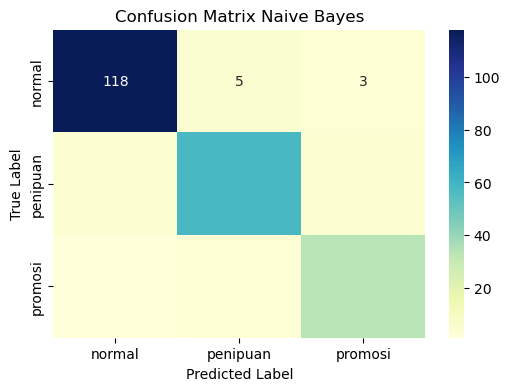

In [55]:
# menampilkan confusion matrix menggunakan heatmap

labels = ['normal', 'penipuan', 'promosi']

plt.figure(figsize=(6,4))
sns.heatmap(CM, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
# menyimpan model
pickle.dump(model, open("model_fraud.sav", "wb"))